In [88]:
import torch
from torchvision.transforms import v2
from PIL import Image
import matplotlib.pyplot as plt


def plot_images(image_tensors_list):
    image_tensors_list = [img.detach().cpu() for img in image_tensors_list]
    n = len(image_tensors_list)
    h, w = max(n//3, 1), min(n,3)
    fig, axs = plt.subplots(h, w, figsize=(10*h, 10*w))

    for i, img in enumerate(image_tensors_list):
        
        if h>1 or w>1:
            idx = (i//3, i%3) if h>1 else i%3
            axs[idx].imshow(img.permute(1, 2, 0), cmap="gray")
            axs[idx].axis('off')
        else:
            axs.imshow(img.permute(1, 2, 0), cmap="gray")
            axs.axis('off')

    plt.show()


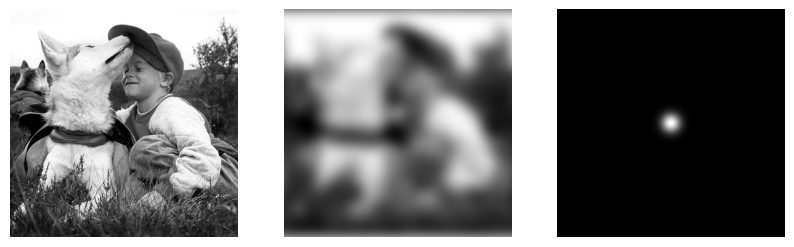

In [90]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#source: https://en.wikipedia.org/wiki/Dog#/media/File:Siberian_Husky_pho.jpg
image_path = "./data/Siberian_Husky_pho.jpg"
image_size = 701
transform = v2.Compose([
        v2.ToImage(), 
        v2.ToDtype(torch.float32, scale=True), 
        v2.Grayscale(num_output_channels=1),
        v2.CenterCrop(image_size),
    ])

image = transform(Image.open(image_path)).to(device)

std = 20
k = image_size
gaussian_blur = v2.GaussianBlur(kernel_size=(k, k), sigma=std)
id_kernel = torch.zeros((1, k, k)).to(device)
id_kernel[0,k//2,k//2] = 1.0
gaussian_kernel = gaussian_blur(id_kernel)

torch_gauss_conv2d = torch.nn.Conv2d(1, 1, (k,k), padding="same", bias=False, padding_mode='circular', device=device)
torch_gauss_conv2d.weight.data = gaussian_kernel[None,:,:,:]

plot_images([image, torch_gauss_conv2d(image[None,:])[0,:], gaussian_kernel])
